#Projeto criado para o Santander Bootcamp 2023 - Ciência de Dados com Python

##Orientações:

Entendendo o Desafio

Agora é a sua hora de brilhar e construir um perfil de destaque na DIO! Explore todos os conceitos explorados até aqui e replique (ou melhore, porque não?) este projeto prático. Para isso, crie seu próprio repositório e aumente ainda mais seu portfólio de projetos no GitHub, o qual pode fazer toda diferença em suas entrevistas técnicas 😎 <br/>
<br/>

Vocês já mergulharam a fundo no mundo da Ciência de Dados conosco! Juntos, construímos um pipeline ETL eficaz, começando com a simples extração de IDs de usuários de uma planilha, seguindo para uma transformação inovadora com a IA do GPT-4 da OpenAI, e culminando no carregamento desses dados transformados de volta ao 'Santander Dev Week 2023'. Agora, o desafio é reimaginar esse processo de ETL. Como vocês aplicariam o que aprenderam em um novo domínio de aplicação, sem depender diretamente de APIs externas (caso queiram simplificar)? Pensem nas infinitas possibilidades e domínios que podem ser explorados, e deixem a criatividade fluir!

#Projeto ETL_python_ds_Gustavoaraujo

Projeto criado para o Santander Bootcamp 2023 - Ciência de Dados com Python

O projeto consiste na extração de dados de criptoativos, aplicação de uma técnica de clusterização e posterior exportação do resultado em um arquivo CSV para consumo posterior por uma ferramenta de data visualization.

#Game plan:
[E] - realizar a extração de dados de algum ativo financeiro (devido ao patrocinador ser o Santander).

[T] - Realizar algum agrupamento e classificação de dados.

[L] - Salvar os arquivos em csv para posterior consumo em alguma ferramenta de visualização de dados (Power BI por exemplo).

Obs.: Optei por fazer o desafio com informações de criptomoedas, pois é um assunto que envolve finanças e tecnologia.

### Extração de dados

In [4]:
# Chamada das Libs a serem utilizadas
import requests
import json
import pandas as pd
from datetime import datetime


In [5]:
# Optei por utilizar a API da Coincap, pois possui um Free tier em que não precisa de cadastro para fazer até 200 requests por minuto.

#Documentação da API : https://docs.coincap.io/

#url para chamada da request
coincap_api_url = "https://api.coincap.io/v2/assets"

In [6]:
#Criação da chamada GET da API
response  = requests.get(coincap_api_url)

#Verifica se a requisiçaõ foi feita com sucesso (status_code == 200)
if response.status_code == 200:
  #caso tenha sucesso pega os dados em formato de json
  coincap_data = response.json()
else:
  #caso não tenha sucesso, informa qual foi o erro
  print(response.status_code)



In [7]:
#Colocando o resutlado da extração de dados em um dataframe do pandas

#convertendo os dados para Json dumps para poder enviar para o dataframe do pandas
coincap_json = json.dumps(coincap_data)

#convertendo o Json para um dataframe
df_cripto = pd.read_json(coincap_json)

#Pegando timestamp de quando as informações forma geradas
data_created_at = df_cripto["timestamp"].unique()

#Extraindo as informações de dentro da coluna data
df_cripto = pd.DataFrame(df_cripto['data'].tolist())

#Exibindo os dados para conferência da qualidade da extração
df_cripto.head(10)

#'bitcoin','ethereum','tether','binance-coin','usd-coin','xrp'

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,19460625.0000000000000000,21000000.0000000000000000,505583986524.3359801786216250,5043073720.2638632714667968,25979.8432231408796058,-4.8593112319329290,26540.4544300873708686,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,120131756.1693597400000000,None,197772998853.3484287116581024,2155302924.9588303402048136,1646.3007381206628141,-3.5176212044556352,1678.6771025510828129,https://etherscan.io/
2,tether,3,USDT,Tether,82842337234.0993000000000000,None,82851298413.9350349478125778,8867371982.4044444282211426,1.0001081714994401,0.0067146700867399,1.0000300675252561,https://www.omniexplorer.info/asset/31
3,binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,36124465888.4032795652464516,151579555.3803684061321331,216.5720459454108767,-3.3181201919472446,220.7573393182651807,https://etherscan.io/token/0xB8c77482e45F1F44d...
4,usd-coin,5,USDC,USD Coin,26258163462.1215630000000000,None,26263708185.1463624906766484,448162853.2625889470762505,1.0002111618747746,0.0238120481251380,1.0002156847352176,https://etherscan.io/token/0xa0b86991c6218b36c...
5,xrp,6,XRP,XRP,45404028640.0000000000000000,100000000000.0000000000000000,23196804431.8923281829301120,479623687.0872900686992916,0.5108974936082308,-3.2576719223405550,0.5183631952777545,https://xrpcharts.ripple.com/#/graph/
6,dogecoin,7,DOGE,Dogecoin,140634406383.7052000000000000,None,8985080333.9134365763215969,157307369.5044310930770941,0.0638896310295409,-2.9931116207027500,0.0652437598804071,http://dogechain.info/chain/Dogecoin
7,cardano,8,ADA,Cardano,35048010482.3520000000000000,45000000000.0000000000000000,8948044690.8610985406723868,73054440.1707568910686347,0.2553082063065114,-4.0389958303607730,0.2600194529873118,https://cardanoexplorer.com/
8,solana,9,SOL,Solana,407234211.5003290000000000,None,8039807990.4989401547576480,106139524.4122401043085928,19.7424670213210829,-5.3758164047290722,20.1828886699601026,https://explorer.solana.com/
9,tron,10,TRX,TRON,89442500282.2074100000000000,None,6876845629.6860774723819997,60278398.6129990850853020,0.0768856595912276,1.5136119681137880,0.0761007767976074,https://tronscan.org/#/


### Transformação dos dados

Para etapa de transformação, vou tentar criar uma clusterização dos criptoativos considerando 2 variáveis: </br>

- volumeUsd24Hr: quantity of trading volume represented in USD over the last 24 hours.
- changePercent24Hr: the direction and value change in the last 24 hours.

utilizaremos o método K means!

In [8]:
#importação das libs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
#Criando um novo DF com informações para esta análise
df_cripto_cluster = df_cripto[['id','symbol','name','changePercent24Hr','volumeUsd24Hr']]

#selecionando as top 10 criptomoedas para análise separada
df_cripto_cluster_top10 = df_cripto_cluster.head(10).copy()
df_cripto_cluster_top10['Cluster'] = 'top 10'

#Removendo as top 10 criptomoedas para uma melhor análise da distribuição
df_cripto_cluster = df_cripto_cluster.drop(df_cripto_cluster.index[:10])


#removendo valores em branco
df_cripto_cluster = df_cripto_cluster.dropna()

#convertendo 'changePercent24Hr','volumeUsd24Hr' para valores
df_cripto_cluster['changePercent24Hr'] = df_cripto_cluster['changePercent24Hr'].astype('float')
df_cripto_cluster['volumeUsd24Hr'] = df_cripto_cluster['volumeUsd24Hr'].astype('float')
#print(df_cripto_cluster.dtypes)

#Retirando valores mais extremos
retirar_id = ['bitcoin','ethereum','tether','usd-coin','xrp','binance-coin']
df_cripto_cluster = df_cripto_cluster.query('id not in @retirar_id')


#Verificando a seleção
df_cripto_cluster.head(5)


,id,symbol,name,changePercent24Hr,volumeUsd24Hr
10,polkadot,DOT,Polkadot,-5.872365,5.954119e+07
11,multi-collateral-dai,DAI,Multi Collateral DAI,0.010248,1.177778e+07
12,polygon,MATIC,Polygon,-4.496025,1.035020e+08
13,shiba-inu,SHIB,Shiba Inu,-1.989357,4.381655e+07
14,litecoin,LTC,Litecoin,-5.374337,1.296230e+08


<ipython-input-10-084b351c752e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cripto_cluster['changePercent24Hr'], df_cripto_cluster['volumeUsd24Hr'], cmap='rainbow')


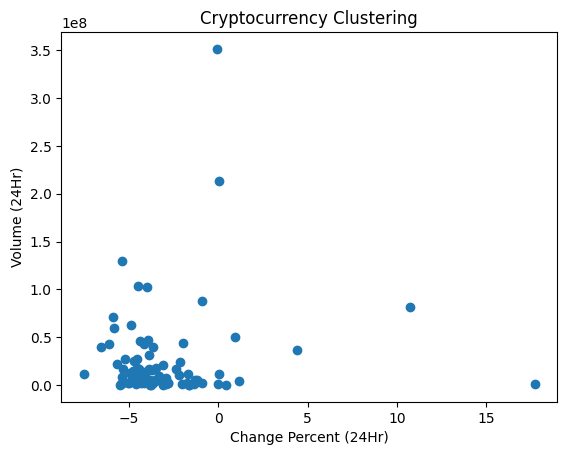

In [10]:
plt.scatter(df_cripto_cluster['changePercent24Hr'], df_cripto_cluster['volumeUsd24Hr'], cmap='rainbow')
plt.xlabel('Change Percent (24Hr)')
plt.ylabel('Volume (24Hr)')
plt.title('Cryptocurrency Clustering')
plt.show()

In [11]:
#Procurando a quantidade ideal de clusters
#selecionando somente as variáveis
var = df_cripto_cluster[['changePercent24Hr','volumeUsd24Hr']]

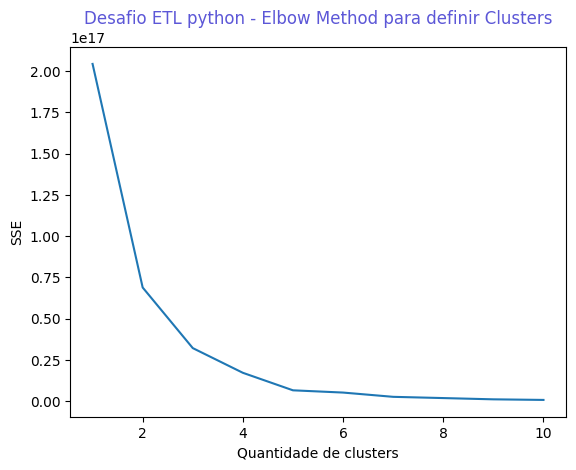

In [12]:
# Uso do método do cotovelo para achar a quantidade otima de clusters (a ideia é verificar em um gráfico a melhor distância da soma dos quadrados para que não clusterize de menos nem de mais )

# Calculando a soma das distâncias dos quadrados(sse) dos centroides dos clusters mais próximos para diferentes valores de K
sse = []
# o range é a qunatidade possivel de clusters
for k in range(1, 11):
    # iterando a quatidade de clustes e padronizando o ponto inicial
    kmeans = KMeans(n_clusters=k, random_state = 42 ,init = 'k-means++',n_init = 'auto')
    #aplicando o KMeans no df Var, setado no cmd anterior
    kmeans.fit(var)
    # incluindo valores na lista
    sse.append(kmeans.inertia_)

# plotando o método do cotovelo (Elbow Method)
dio_color = '#5C57D7'
plt.plot(range(1, 11), sse)
plt.title("Desafio ETL python - Elbow Method para definir Clusters",color = dio_color)
plt.xlabel('Quantidade de clusters')
plt.ylabel('SSE')
plt.show()

Pelo gráfico, podemos observar que a quantidade ideal de clusters é entre 2 e 4, portanto escolheremos 3 clusters!

In [13]:
#Selecionando a quantidade de clustesr
qtd_clusters = 6

# aplicando o KMeans clustering
kmeans = KMeans(n_clusters = qtd_clusters,random_state = 0,n_init ='auto')
clusters = kmeans.fit_predict(var)

In [14]:
#visualizando os resultados finais

#colocando o clusters no df
df_cripto_cluster.loc[:, 'Cluster'] = clusters


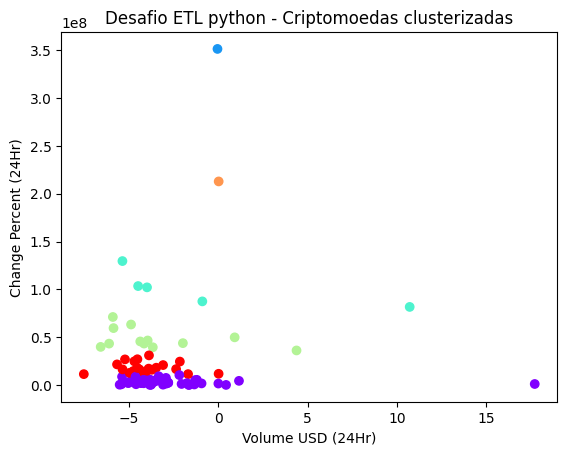

In [15]:
#Visualizando a criação dos clusters
plt.scatter(df_cripto_cluster['changePercent24Hr'], df_cripto_cluster['volumeUsd24Hr'], c=clusters, cmap='rainbow')
plt.xlabel('Volume USD (24Hr)')
plt.ylabel('Change Percent (24Hr)')
plt.title('Desafio ETL python - Criptomoedas clusterizadas')
plt.show()

In [16]:

# Juntando os dataframes
df_cripto_final = pd.concat([df_cripto_cluster, df_cripto_cluster_top10], axis=0)

### Carga de dados

Gerar Arquivo CSV para ser consumindo em uma ferramenta de data visualization!

In [23]:
import numpy as np

#Pegando a data da extração das informações
created_at = data_created_at[0]

created_at = created_at.astype('datetime64[D]').tolist()

#gerando o nome do arquvio para exportar
nome_arquivo = f"""cripto_clustering_{created_at}.csv"""

#Exportando o csv
df_cripto_final.to_csv(nome_arquivo)
